In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy
from pyathena import ath_hst
import pyathena as pa
import copy

355510.97
250
222832.42
300
325431.25
350
227592.4
400
178696.38
450
No ICM


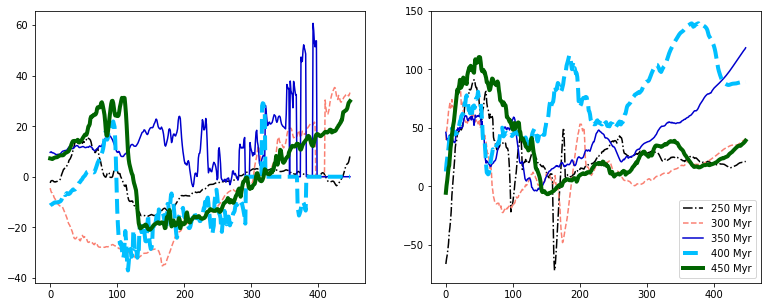

355510.97
250
523842.56
300
527399.75
350
286859.6
400
514441.53
450
P3


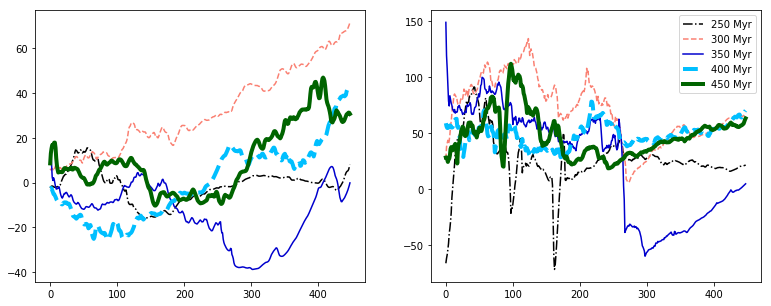

355510.97
250
518937.6
300
385025.03
350
243145.97
400
52031.84
450
P7


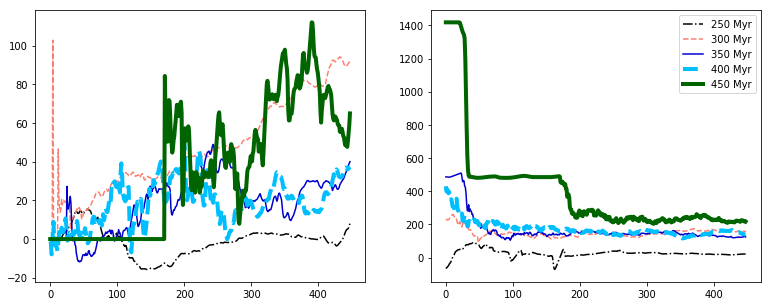

2844106.2
250
4216058.5
300
4178559.2
350
2357916.2
400
4062050.8
450
P3h


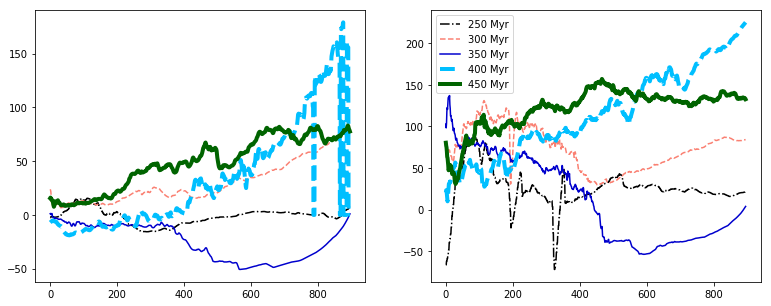

2844106.2
250
4204689.5
300
3113200.2
350
2368959.8
400
823732.44
450
P7h


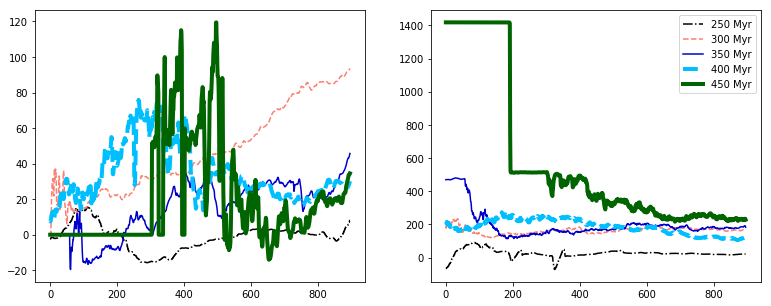

In [30]:
unit = pa.set_units(muH=1.4271)
#print(unit)
#print (unit['density'].cgs / 1.4271 / c.m_p.cgs, unit['velocity'], unit['length'])
#print unit['density']
kb = 1.38064852 * 1e-16 #boltzmann constant erg/K / erg = g cm2/s2
vpc = 7168.*1024*1024/(128*128*896) # volume per cell
'''
z = np.arange(-3588, 3588, 8)
g = 4.5181 * 1e-30  # gravitational constant : pc3/solmass*s2
sig_star = 42  # solmass/pc2
z_s = 245  # pc
r_0 = 8000  # pc
rho_dm = 0.0064  # solmass/pc3
km = 3.24078 * 1e-14  # 1km in parsec
cm = 3.24078 * 1e-19  # 1cm in parsec
gram = 5.02785 * 1e-34  # 1g in solar mass

gext = (2. * np.pi * g * sig_star * (z ) / ((z ) ** 2 + z_s ** 2) ** (0.5) + 4. * np.pi * g * rho_dm * (
            (z ) / (1 + (z ) ** 2 / r_0 ** 2)))  # pc/s2
gext = gext/km/km # km/s2
'''
simid_t = ('RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_4pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_4pc_ICM2_newacc','RPS_8pc_ICM3_newacc')
#labell = ('No ICM','Very Weak' ,'Weak', 'Strong', 'Very Strong','ICM1', 'ICM2', 'ICM3', 'ICM4') #'NonICM',
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14' ,'ICM1', 'ICM2', 'ICM3', 'ICM4')  # r'No ICM',
Model = [0,8.63*1e3,3.46*1e4,3.46*1e4,6.92*1e4,6.92*1e4,1.38*1e5]
Modell = [r'8.63*1e3',r'$3.46x10^4$',r'$6.92x10^4$',r'1.38*1e5']
S = ('-.','--','-','--','-')
W = (1.5,1.5,1.5,4,4)
C = ('k', 'salmon', 'mediumblue','deepskyblue' ,'darkgreen','lime', 'magenta','darkmagenta','goldenrod','royalblue','crimson') # 'plum','orchid','purple'
# overplot Starformation rate of three different simulations

Myr = unit['time'].to('Myr').value
Msun = unit['mass'].to('Msun').value
agebin = 10
crit = 3
for j in (0,2,4,3,5) :
    #basedir = 'G:/yeongu/' # for windows
    basedir='/media/woorak/data2/yeongu/' # for ubuntu
    if  j==5 or j==6 :
        stop = 473
    else:
        stop = 499

    simid = simid_t[j]

    #plt.figure(figsize=(6, 5))
    k=0
    plt.figure(figsize=(13,5))
    
    for tidx in (250,300,350,400,450): #range(300, stop):  # time step 251, 331, 411, 501
        #plt.figure(figsize=(6, 5))
        vtkfname = '%s%s/id0/%s.%04d.vtk' % (basedir, simid, simid, tidx)
        # read in domain information
        ds = pa.AthenaDataSet(vtkfname)
        
        if j==3 or j==5:
            mid = 896
        else:
            mid = 448
        d = ds.read_all_data('density')[mid::,:,:]
        dh = copy.copy(d)
        
        velz = ds.read_all_data('velocity')[mid::,:,:,2]
        velzh = copy.copy(velz)
        
        T1 = ds.read_all_data('T1'); coolftn = pa.coolftn()
        temp = coolftn.get_temp(T1)[mid::,:,:]
        #temph = copy.copy(temp)
        
        d[temp > 20000]=0; velz[temp > 20000]=0
        
        dh[temp < 20000]=0; velzh[temp < 20000]=0
        
        VC = []
        VH = []
        print np.sum(d)
        for i in range(mid):
            
            if np.sum(d[i,:,:])==0:
                vc=0
            else:
                vc = np.average(velz[i,:,:],weights=d[i,:,:])
            vh = np.average(velzh[i,:,:],weights=dh[i,:,:])
            VC.append(vc)
            VH.append(vh)
            #hist_c, edge_c = np.histogram(velz[i,:,:],weights=d[i,:,:])
            #hist_h, edge_h = np.histogram(velzh[i,:,:],weights=dh[i,:,:])
            #plt.plot(edge_c[0:-1],hist_c)
            #plt.plot(edge_h[0:-1],hist_h)
            #plt.show()
        
        plt.subplot(1,2,1)
        plt.plot(VC,c=C[k],ls=S[k],lw=W[k],label='%s Myr' % tidx)
        plt.subplot(1,2,2)
        plt.plot(VH,c=C[k],ls=S[k],lw=W[k],label='%s Myr' % tidx)
        print tidx
        k=k+1
    plt.legend(loc=0)
    print labell[j]
    plt.show()